In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [229]:
data=pd.read_csv("customer_support_tickets.csv")

In [230]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [232]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [233]:
data['Ticket Status'].value_counts()

,count
Ticket Status,
Pending Customer Response,2881
Open,2819
Closed,2769


In [234]:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [235]:
common_issues = data['Ticket Subject'].value_counts().head(15)
common_issues

,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547
Battery life,542
Network problem,539
Installation support,530
Product setup,529


# Plotting ticket trends over time

In [236]:
print(data['Ticket Status'].unique())

['Pending Customer Response' 'Closed' 'Open']


Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


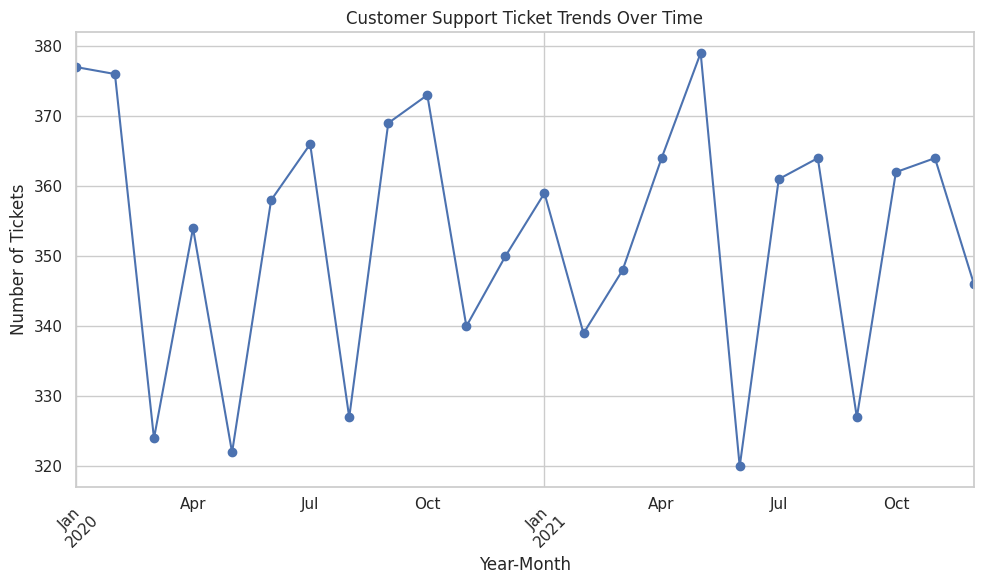

In [237]:
#Analyze customer support ticket trends
# Identify common issues
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)
# Plotting ticket trends over time
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. The number of tickets fluctuates throughout the period, with noticeable peaks in January 2020 and April 2021, suggesting specific events or issues might have contributed to these increases.
2. There are regular low-ticket months, such as in April 2020 and July 2021, indicating potentially fewer support requests during those periods, which could correlate with seasonal trends or product stability.

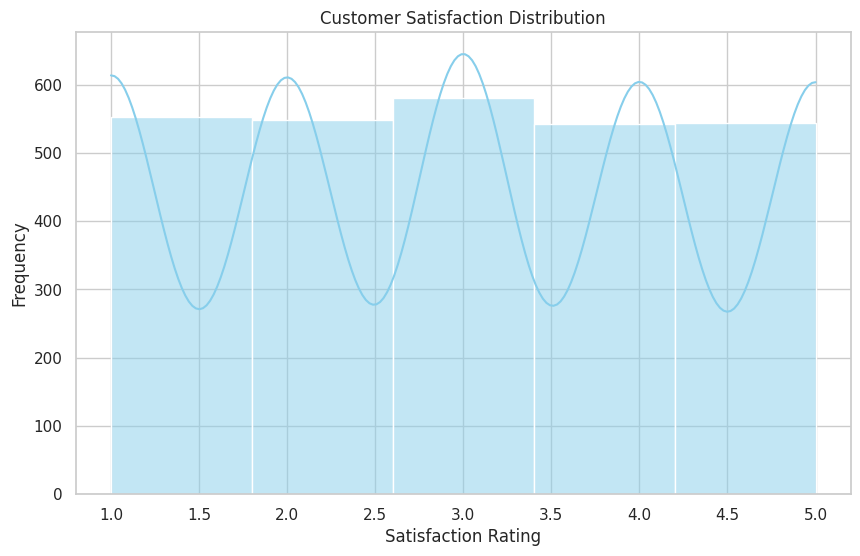

In [238]:
# Set up the plotting aesthetics
sns.set(style="whitegrid")
#Customer Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5,
kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

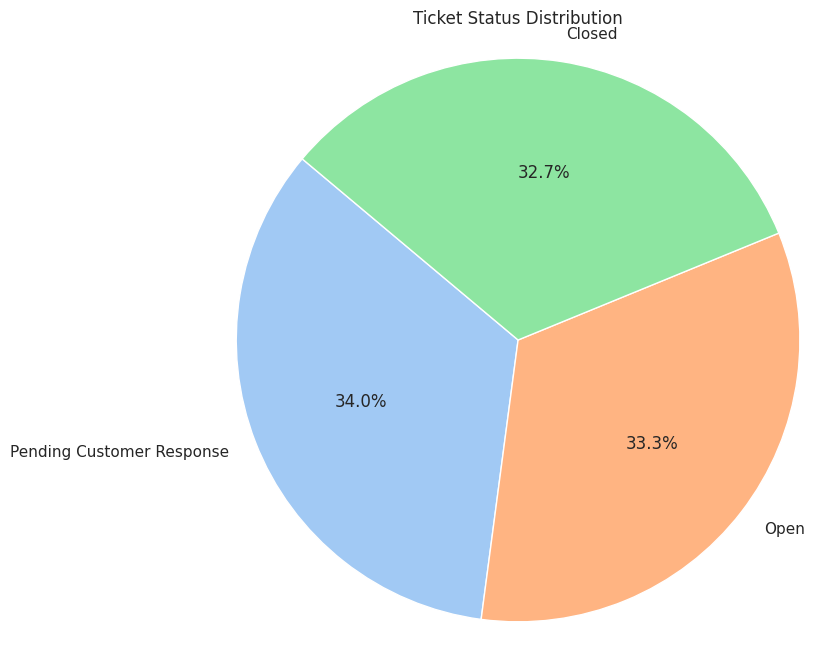

In [239]:
#Ticket Status Distribution
ticket_status_distribution = data['Ticket Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

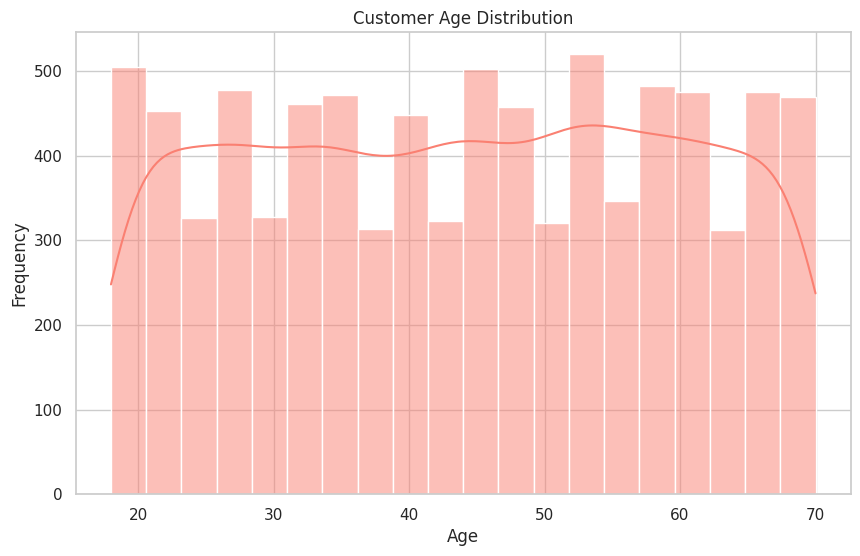

In [240]:
#Customer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

1. The majority of customers fall within the 30 to 60 age range, indicating that the service is most popular among middle-aged customers.
2. The distribution is fairly uniform, but there is a slight dip in frequency around the ages of 20-30 and 60-70, suggesting fewer younger and older customers are engaging with the service.

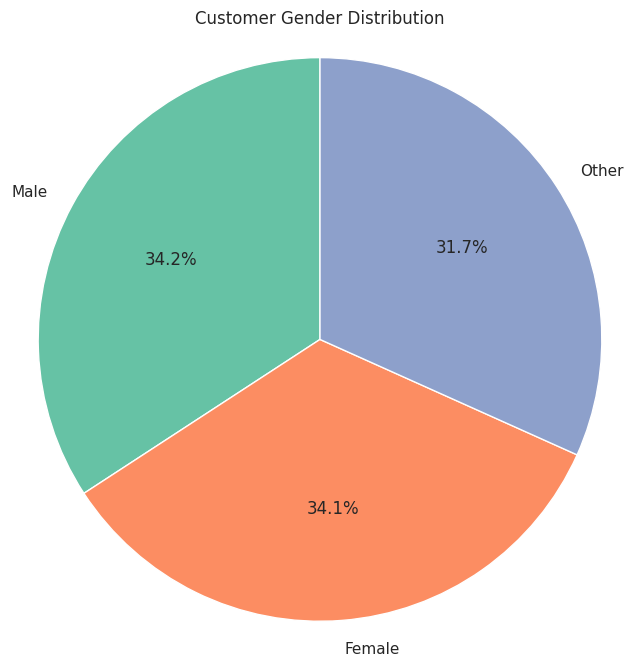

In [241]:
#Customer Gender Distribution
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

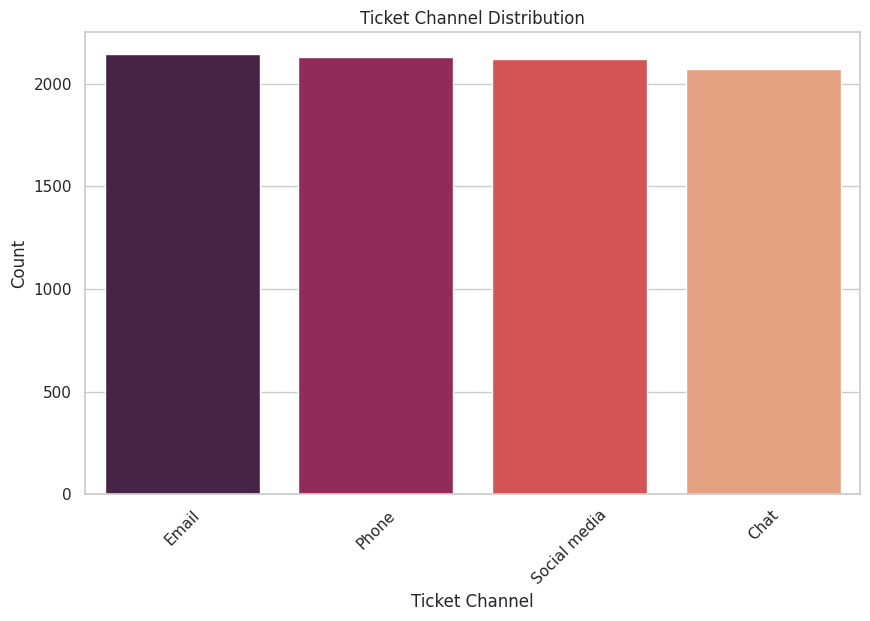

In [242]:
#Ticket Channel Distribution
plt.figure(figsize=(10, 6))
ticket_channel_distribution = data['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

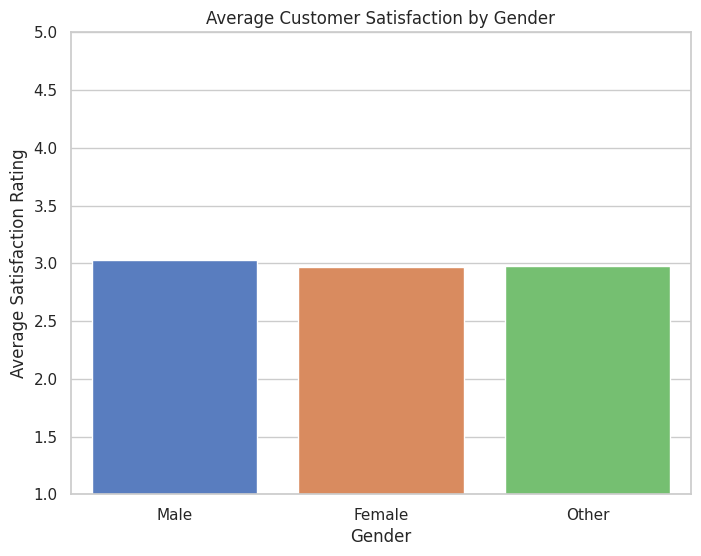

In [243]:
#Chart 1: Average Customer Satisfaction by Gender (Bar Plot)
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed
plt.show()


Text(0.5, 0, 'Count')

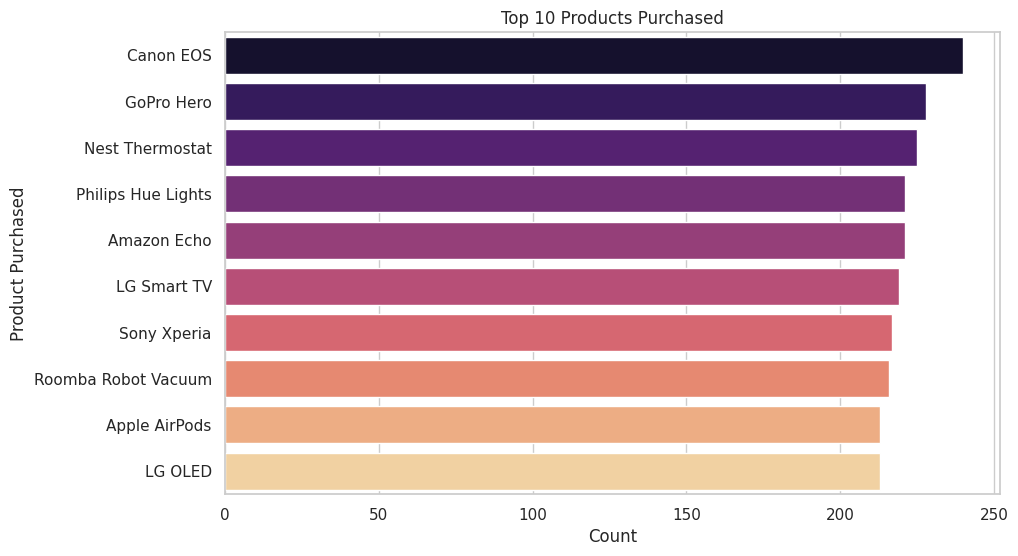

In [244]:
#Product Purchased Distribution
plt.figure(figsize=(10, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')

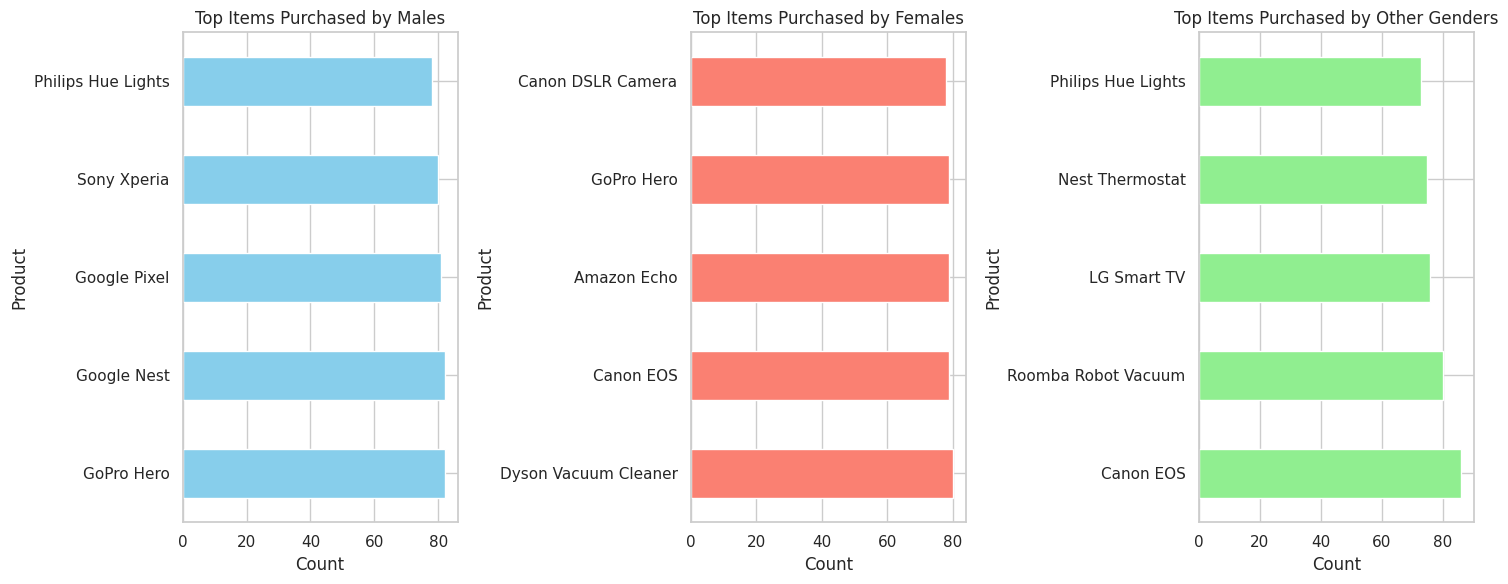

In [246]:
# Chart 2: Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))
# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')
# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

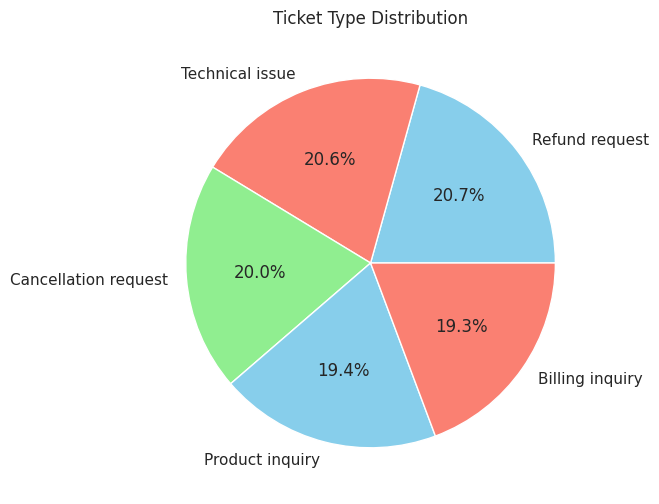

In [249]:
# Count ticket types
ticket_type_distribution = data['Ticket Type'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

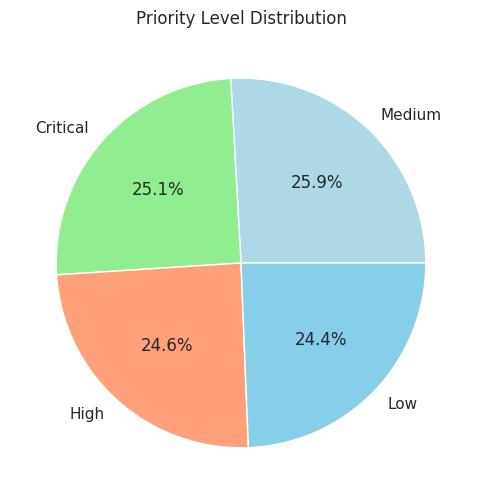

In [250]:
# Count ticket priorities
priority_distribution = data['Ticket Priority'].value_counts()
# Plot
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

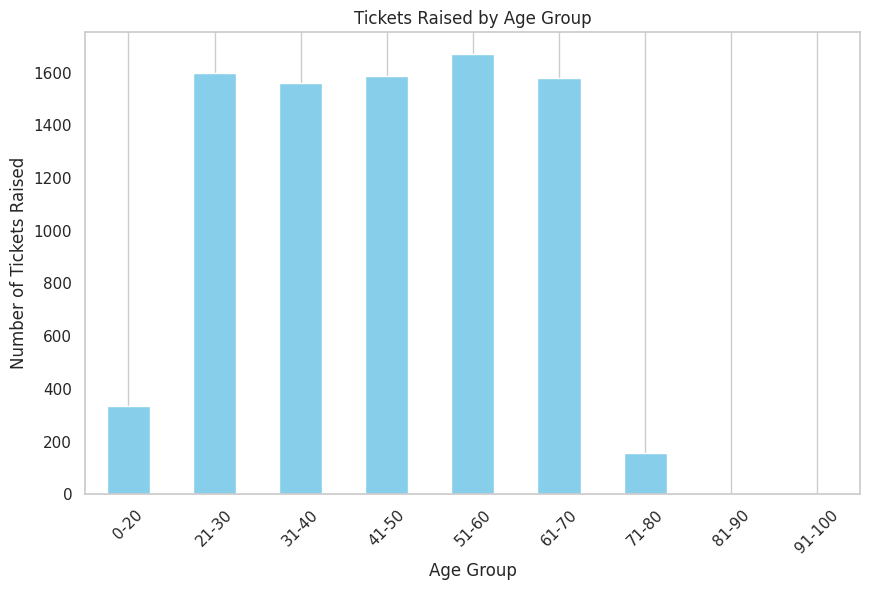

In [251]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70','71-80', '81-90', '91-100']
# Categorize customers into age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,
labels=labels, right=False)
# Calculate number of tickets raised by each age group
tickets_by_age_group = data.groupby('Age Group').size()
# Plot
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

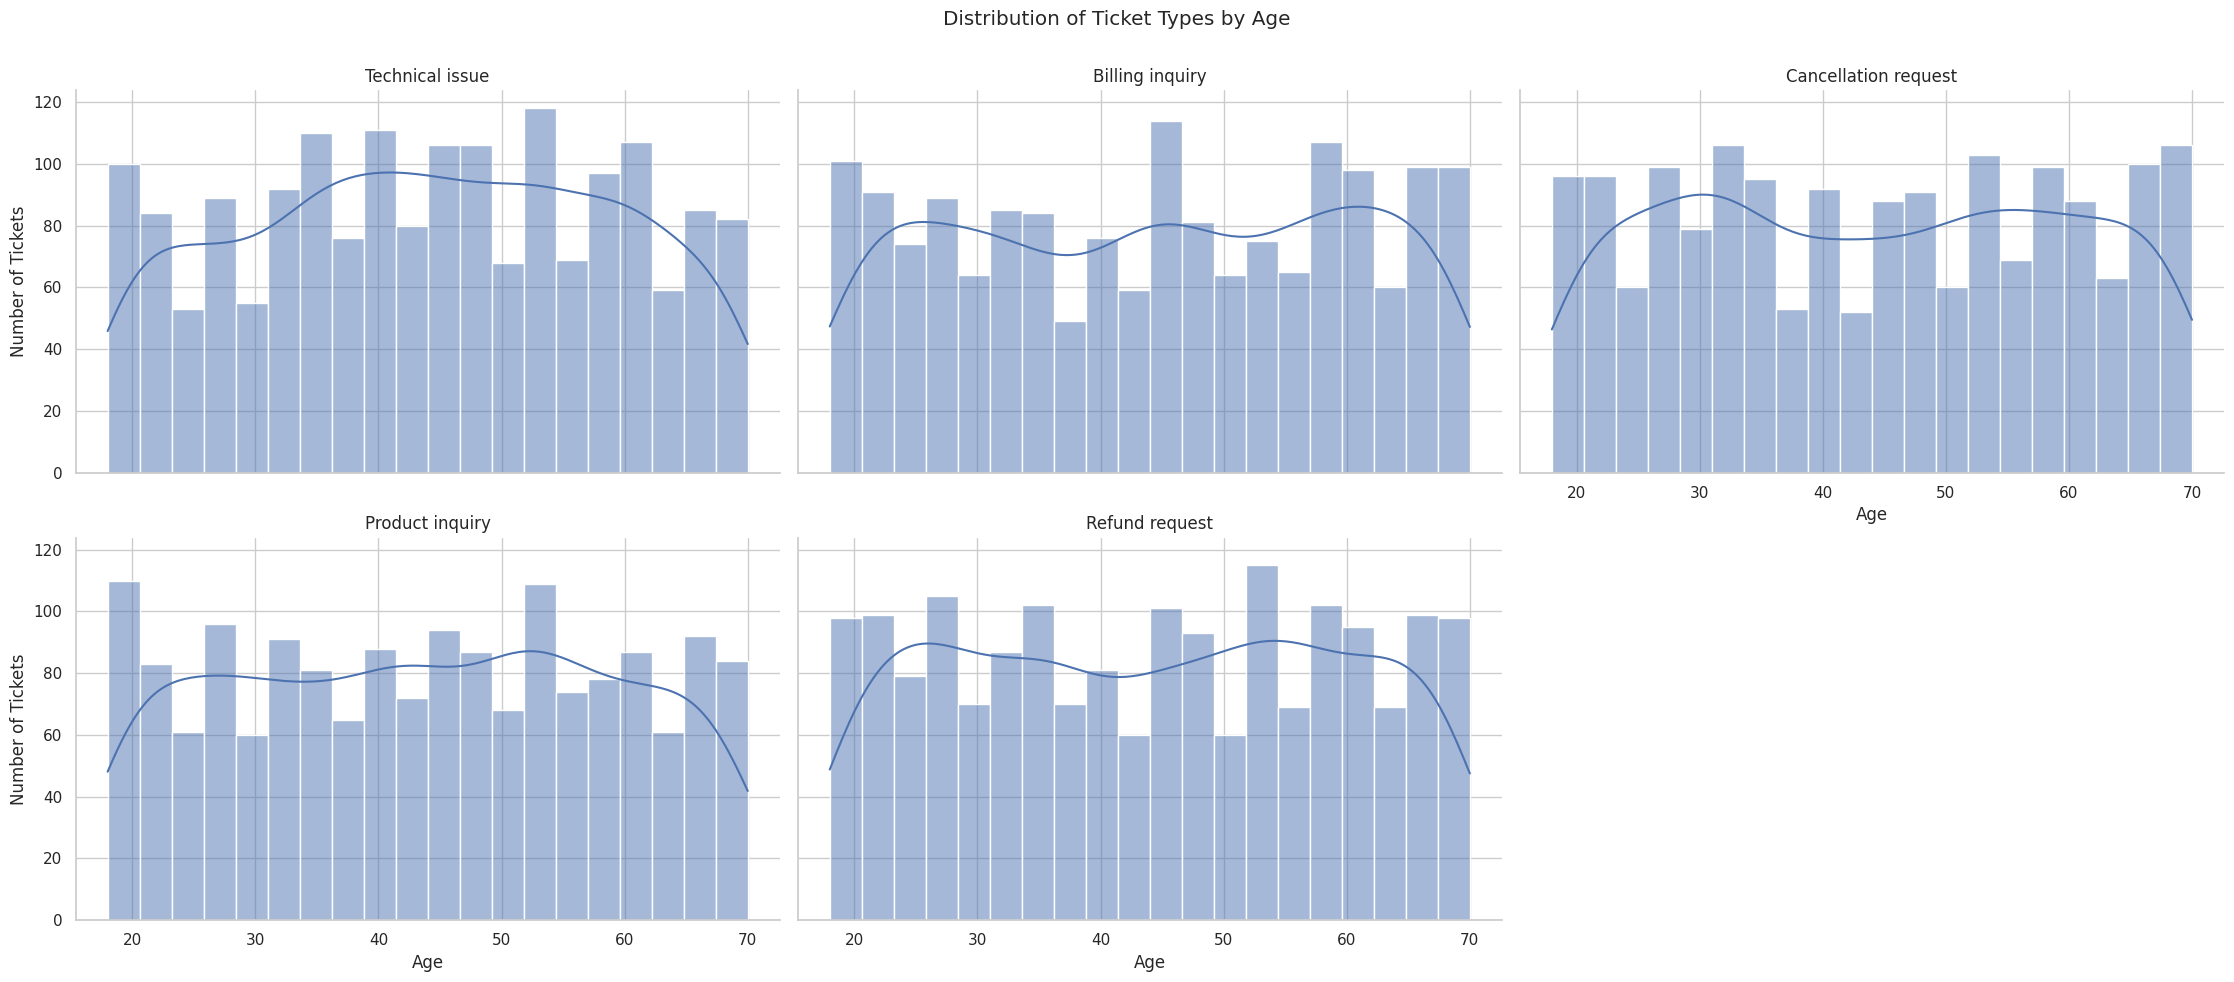

In [252]:
#linkcode
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Create a facet grid for each ticket type
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
# Show plot
plt.show()

1. Technical issues are most prevalent among the younger age groups, particularly in the 20-30 age range, suggesting a higher frequency of tech-related problems among younger customers.
2. Billing inquiries show a steady trend across all age groups, with a slight increase in frequency in older age brackets (50-70 years), which could indicate a greater need for clarification or issues in billing for older customers.
3. Cancellation requests are more frequent among customers aged 30-50, which might suggest that mid-age customers are more likely to cancel their services or subscriptions.
4. Product inquiries remain fairly consistent across all age groups, with a peak in the 20-30 range, indicating that younger customers may inquire more about products.
5. Refund requests slightly increase for customers aged 30-50 but decrease for older age groups, possibly reflecting varying expectations or satisfaction levels.

In [253]:
# Handling missing values
data = data.dropna()

In [254]:
data.value_counts().sum()

2769

In [255]:
data.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [256]:
data.columns
num_col=data.select_dtypes(include="number")
cat_col=data.select_dtypes(include="object")
# Encoding categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
for column in cat_col:
  label_encoders[column] = LabelEncoder()
  data[column] = label_encoders[column].fit_transform(data[column])
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,YearMonth,Age Group
2,3,519,844,48,2,10,2020-07-14,4,8,53,0,343,2,3,1347,2153,3.0,2020-07,41-50
3,4,475,252,27,0,25,2020-11-13,0,0,627,0,2549,2,3,946,293,3.0,2020-11,21-30
4,5,34,251,67,0,5,2020-02-04,0,3,188,0,2657,2,1,96,2356,1.0,2020-02,61-70
10,11,1297,1619,48,1,30,2021-01-19,1,3,1323,0,1368,1,2,2079,85,1.0,2021-01,41-50
11,12,290,580,51,1,27,2021-10-24,2,15,360,0,1366,1,0,1452,1168,1.0,2021-10,51-60


<Axes: >

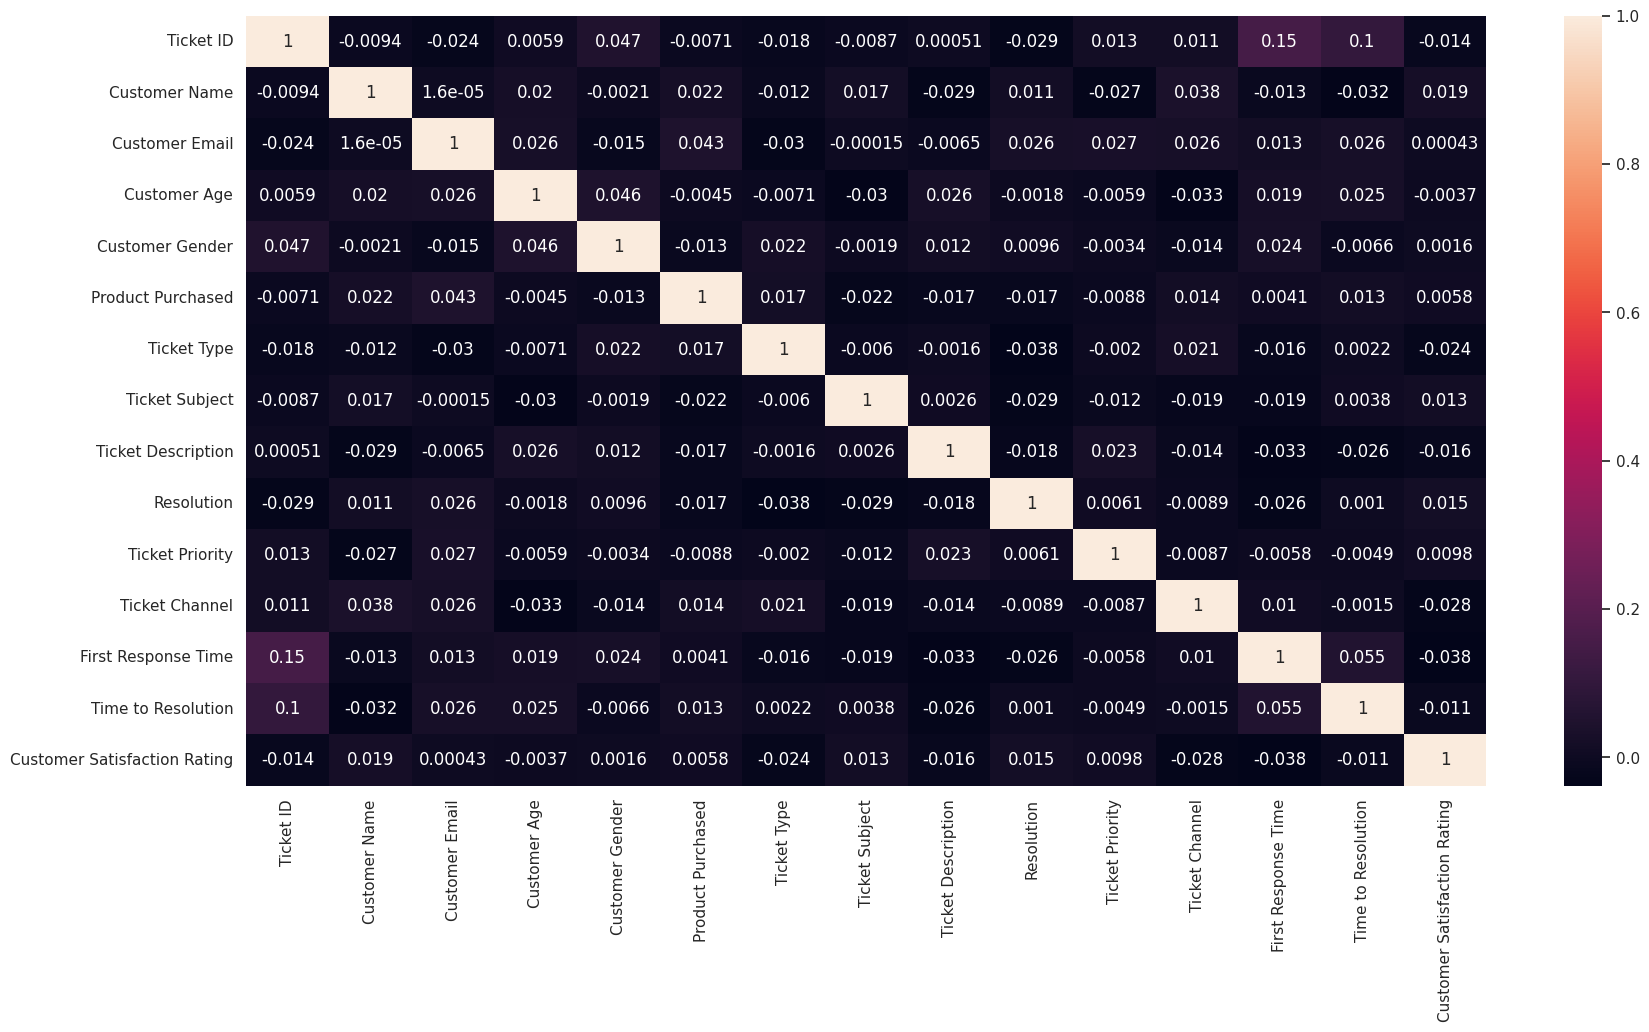

In [275]:
cor=data.drop(["Age Group","Ticket Status","Date of Purchase","YearMonth"],axis=1).corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

1. Customer Satisfaction Rating has a weak negative correlation with First Response Time (-0.14), suggesting that faster response times could slightly improve satisfaction, but the relationship is not strong.
2. There is a moderate positive correlation between Time to Resolution and Customer Satisfaction Rating (0.055), indicating that quicker resolutions may slightly improve customer satisfaction.
3. First Response Time shows a small positive correlation with Ticket Priority (0.15), implying that higher priority tickets might receive faster responses.

In [277]:
# Define features and target variable
from sklearn.model_selection import train_test_split
X = data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [278]:
if 'Date of Purchase' in X_train.columns:
    X_train['Date of Purchase'] = X_train['Date of Purchase'].astype('int64') // 10**9  # Convert to seconds
    X_test['Date of Purchase'] = X_test['Date of Purchase'].astype('int64') // 10**9

In [279]:
if 'YearMonth' in X_train.columns:
    X_train['YearMonth'] = X_train['YearMonth'].astype(str).str.replace('-', '').astype(int)
    X_test['YearMonth'] = X_test['YearMonth'].astype(str).str.replace('-', '').astype(int)

In [280]:
if 'Age Group' in X_train.columns:
    X_train['Age Group'] = X_train['Age Group'].astype(str).str.replace('-', '').astype(int)
    X_test['Age Group'] = X_test['Age Group'].astype(str).str.replace('-', '').astype(int)

In [281]:
print(X_train.dtypes)

Customer Name          int64
Customer Email         int64
Customer Age           int64
Customer Gender        int64
Product Purchased      int64
Date of Purchase       int64
Ticket Type            int64
Ticket Subject         int64
Ticket Description     int64
Ticket Status          int64
Resolution             int64
Ticket Priority        int64
Ticket Channel         int64
First Response Time    int64
Time to Resolution     int64
YearMonth              int64
Age Group              int64
dtype: object


In [298]:
# Model Building
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
para_ran={"n_estimators":[10,20,50,100],"max_depth":[10,20,50,100,200]}
grid=GridSearchCV(RandomForestClassifier(random_state=10),para_ran,cv=10)
grid.fit(X_train,y_train)
best_para=grid.best_params_
best_score=round(grid.best_score_,2)
print(f"the best parameters are {best_para}")
print(f"the best score is {best_score}")

the best parameters are {'max_depth': 10, 'n_estimators': 100}
the best score is 0.2


In [300]:
crf=RandomForestClassifier(max_depth=10,n_estimators=100,random_state=42)
crf.fit(X_train,y_train)
y_pred=crf.predict(X_test)
score=crf.score(X_test,y_test)
print(f"accuracy of the model is {score*100}")

accuracy of the model is 20.938628158844764


<Axes: >

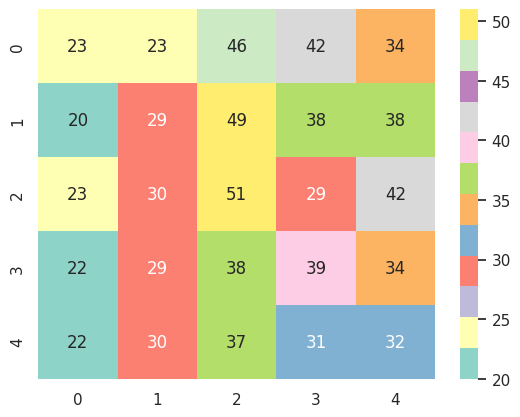

In [284]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Model Evaluation
con_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot=True,fmt="d",cmap="Set3")

In [312]:
c1=classification_report(y_test,y_pred)
print(c1)


              precision    recall  f1-score   support

         1.0       0.21      0.14      0.17       168
         2.0       0.21      0.17      0.18       174
         3.0       0.23      0.29      0.26       175
         4.0       0.22      0.24      0.23       162
         5.0       0.18      0.21      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.21      0.21       831
weighted avg       0.21      0.21      0.21       831



In [310]:
accuracy_score(y_test, y_pred)

0.20938628158844766

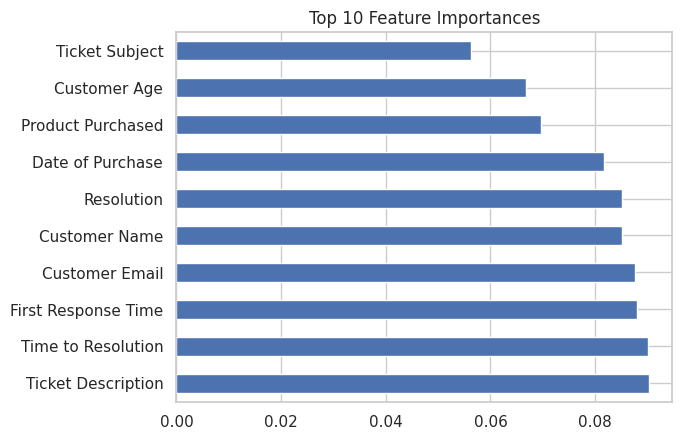

In [311]:
# Visualization of Results
# Feature Importance
feature_importances = pd.Series(crf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()